In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

### Loading the data

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### Getting to know the data

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Boxplot for the "Median value of owner-occupied homes"

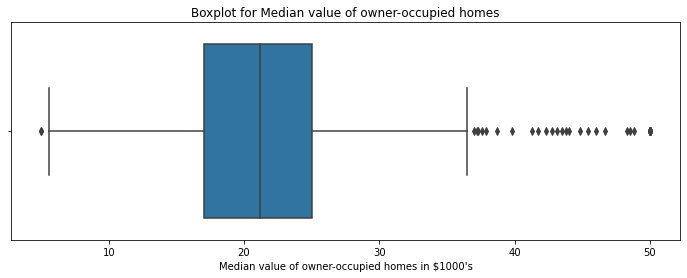

In [20]:
plt.figure(figsize=(12,4))
sns.boxplot(x=boston_df['MEDV'])
plt.title("Boxplot for Median value of owner-occupied homes")
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.show()

Several outliers in the 3rd quartile with the median value of homeowner-occupied homes roughly 210,000

#### Barplot for the Charles river variable

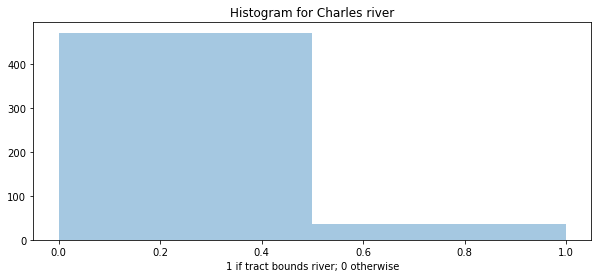

In [19]:
plt.figure(figsize=(10,4))
sns.distplot(a=boston_df.CHAS,bins=2, kde=False)
plt.title("Histogram for Charles river")
plt.xlabel("1 if tract bounds river; 0 otherwise")
plt.show()

The majority of tracts do not bound the Charles River

#### Boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

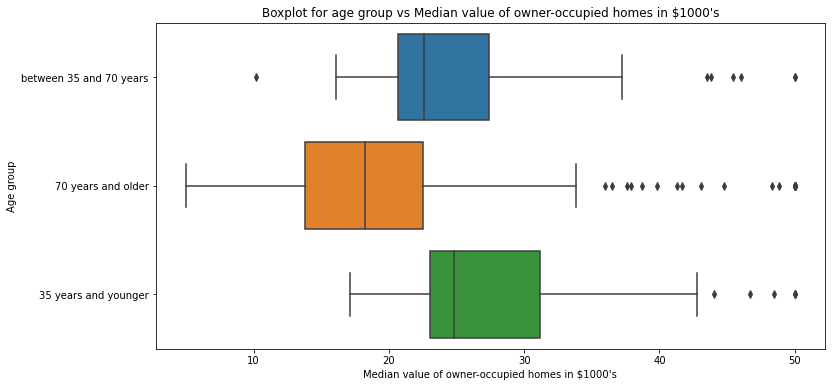

In [10]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

plt.figure(figsize=(12,6))
sns.boxplot(x = boston_df['MEDV'], y=boston_df['age_group'])
plt.title("Boxplot for age group vs Median value of owner-occupied homes in $1000's")
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.ylabel("Age group")
plt.show()

The younger the age group the more value their home has with the 35 and younger group being the highest value, there are more outliers in the 70+ age group

#### Scatterplot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

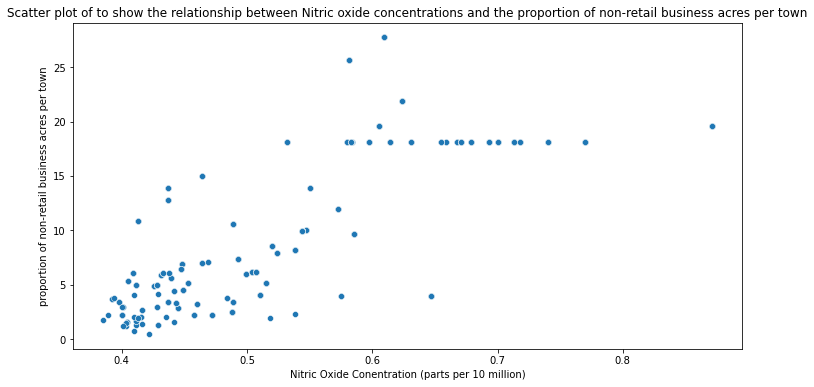

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=boston_df['NOX'], y = boston_df['INDUS'])
plt.title("Scatter plot of to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.xlabel("Nitric Oxide Conentration (parts per 10 million)")
plt.ylabel("proportion of non-retail business acres per town")
plt.show()

There appears to be a linear relationship  until NOX = 0.6

#### Histogram of the pupil to teacher ratio variable

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


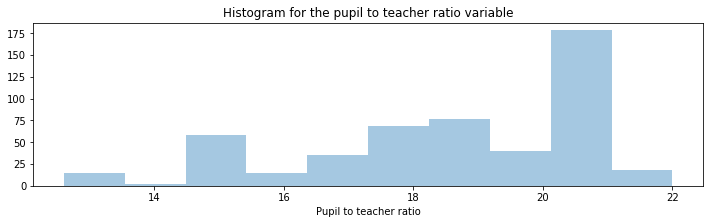

In [21]:
plt.figure(figsize=(12,3))
sns.distplot(a=boston_df['PTRATIO'],bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.xlabel("Pupil to teacher ratio")
plt.show()

The mode ratio of pupils to students appears to be 21

#### Is there a significant difference in median value of houses bounded by the Charles river or not?

Null Hypothesis(): Both average MEDV are the equal

Alternative Hypothesis(): Both average MEDV are NOT the equal

alpha = 0.05

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

P-value is less than alpha = 0.05 so we fail to reject the Null Hypothesis both average MEDV are the equal

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

Null Hypothesis: All 3 age groups MEDV means are equal
    
Alternative Hypothesis: Atleast 1 age group MEDV mean is not equal

alpha : 0.05

In [16]:
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


With a P-value significantly which is smaller than alpha of 0.05 we fail reject the null hypothesis that all 3 age groups MEDV mean are equal

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

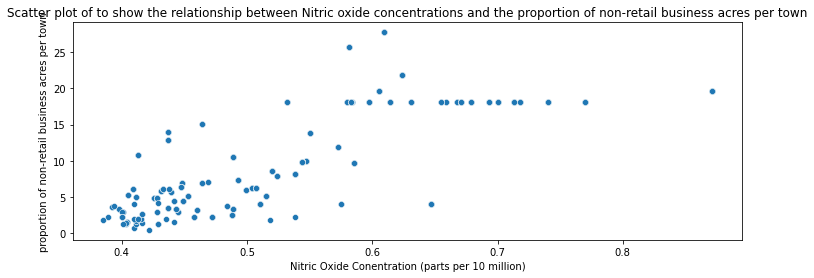

In [17]:
plt.figure(figsize=(12,4))
sns.scatterplot(x=boston_df['NOX'], y = boston_df['INDUS'])
plt.title("Scatter plot of to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.xlabel("Nitric Oxide Conentration (parts per 10 million)")
plt.ylabel("proportion of non-retail business acres per town")
plt.show()

Null Hypothesis: Nitric oxide concentrations and proportion of non-retail business acres per town are not correlated 

Alternative Hypothesis: Nitric oxide concentrations and proportion of non-retail business acres per town are correlated 

alpha = 0.05

In [14]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

The P-Value is less than alpha of 0.05 so we fail to reject the null hypothesis that Nitric oxide concentrations and proportion of non-retail business acres per town are not correlated 

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?


Null Hypothesis: weighted distances to five Boston employment centres are not related to median value

Alternative Hypothesis: weighted distances to five Boston employment centres are related to median value

alpha = 0.05

In [17]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        02:47:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P value less than alpha of 0.05 so there is evidence of correlation

In [22]:
np.sqrt(0.062)  ##R sqaured is 0.062

0.24899799195977465

The square root of R-squared is 0.25, which implies weak correlation